#First steps with scikit-learn – training a perceptron

We previously implemented the Perceptron and Adaline alogirthms ourselves.

Now we will take a look at the scikit-learn API, which combines a user-friendly
interface with a highly optimized implementation of several classification algorithms.

The scikit-learn library offers not only a large variety of learning algorithms, but also many convenient functions to preprocess data and to fine-tune and evaluate our models.

To get started with the scikit-learn library, we will train a perceptron model
similar to the one that we implemented.

We will use the already familiar Iris dataset throughout the following sections. Conveniently, the Iris dataset is already available via scikit-learn, since it is a simple yet popular dataset that is frequently used for testing and experimenting with algorithms. We will only use two features from the Iris dataset for visualization purposes.

We will assign the petal length and petal width of the 150 flower samples to the
feature matrix `X` and the corresponding class labels of the flower species to the vector `y`

In [1]:
%config InlineBackend.figure_format='retina'
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
import numpy as np
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


The `np.unique(y)` function returned the three unique class labels stored
in `iris.target`, and as we see, the Iris flower class names `Iris-setosa`,
`Iris-versicolor`, and `Iris-virginica` are already stored as integers (here: `0`, `1`, `2` ).

Encoding class labels as integers is a common convention among most machine learning libraries.

To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
#print(X_train.shape)
#print(X_test.shape)
#print(y_test)

Using the train_test_split function from scikit-learn's model_selection module,
we randomly split the `X` and `y` arrays into 30 % test data (45 samples) and 70 % training data (105 samples).

Note that the `train_test_split` function already shuffles the training sets
internally before splitting; otherwise, all class 0 and class 1 samples would have ended up in the training set, and the test set would consist of 45 samples from class 2. Via the `random_state` parameter, we provided a fixed random seed
(`random_state=1`) for the internal pseudo-random number generator that is used
for shuffling the datasets prior to splitting. Using such a fixed `random_state` ensures that our results are reproducible.

Lastly, we took advantage of the built-in support for stratification via `stratify=y`. In this context, stratification means that the `train_test_split` method returns training and test subsets that have the same proportions of class labels as the input dataset.

We can use NumPy's `bincount` function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case.

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


We can standardize the features using the `StandardScaler` class from scikit-learn's preprocessing module as follows.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the preceding code, we loaded the `StandardScaler` class from the preprocessing module and initialized a new `StandardScaler` object that we assigned to the `sc` variable. Using the `fit` method, `StandardScaler` estimated the parameters $\mu$ (sample mean) and $\sigma$ (standard deviation) for each feature dimension from the training data. By calling the `transform` method, we then standardized the training data using those estimated parameters $\mu$ and $\sigma$. Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other.

Having standardized the training data, we can now train a perceptron model. Most
algorithms in scikit-learn already support multiclass classification by default via the One-versus-Rest (OvR) method, which allows us to feed the three flower classes to the perceptron all at once. The code is as follows.

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1, verbose=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_train_std)

#print(y_pred)
#print(y_train)
#print('Misclassified training samples:',(y_train!=y_pred).sum())

After loading the `Perceptron` class from the `linear_model` module, we initialized a new `Perceptron` object and trained the model via the `fit` method. Here, the model parameter `eta0` is equivalent to the learning rate eta that we used previously in our own perceptron implementation).

Having trained a model in scikit-learn, we can make predictions via the predict
method, just like in our own perceptron implementation

In [6]:
#help(Perceptron)

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples:', (y_test != y_pred).sum())

Misclassified samples: 1


Executing the code, we see that the perceptron misclassifies one out of the 45 flower samples. Thus, the misclassification error on the test dataset is approximately 0.022 or 2.2% (1 / 45 = 0.022).

Instead of the misclassification error, many machine learning practitioners report the classification accuracy of a model, which is simply calculated as follows: 1 - error = 0.978 or 97.8 %.

The scikit-learn library also implements a large variety of different performance metrics that are available via the metrics module. For example, we can calculate the classification accuracy of the perceptron on the test set as follows.

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


Here, `y_test` are the true class labels and `y_pred` are the class labels that we predicted previously. Alternatively, each classifier in scikit-learn has a score method, which computes a classifier's prediction accuracy by combining the predict call with `accuracy_score`.

In [9]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


Note that we evaluate the performance of our models based on the test set here. This should not be done. Later in the course you will learn about useful techniques, including graphical analysis such as learning curves, to detect and prevent overfitting. Overfitting means that the model captures the patterns in the training data well, but fails to generalize well to unseen data.

Finally, we can use our `plot_decision_regions` function from earlier to plot the decision regions of our newly trained perceptron model and visualize how well it separates the different flower samples. However, let's add a small modification to highlight the samples from the test dataset via small circles.

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'v', 'o')
    colors = ['red', 'blue', 'green']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

With the slight modification that we made to the `plot_decision_regions` function, we can now specify the indices of the samples that we want to mark on the resulting plots. The code is as follows.

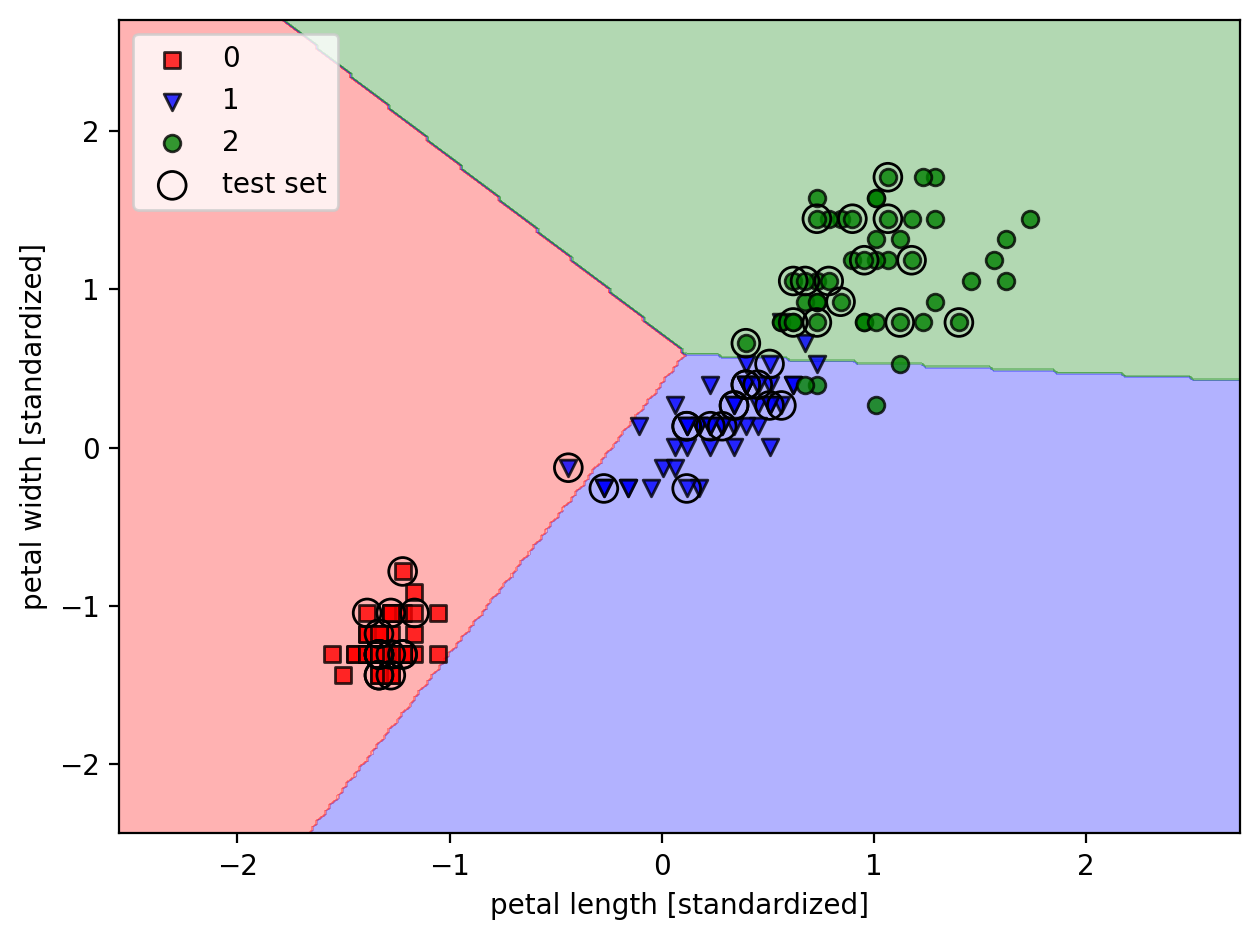

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

As we can see in the resulting plot, the three flower classes cannot be perfectly separated by a linear decision boundary.

Recall from earlier, that the perceptron algorithm never converges on
datasets that aren't perfectly linearly separable, which is why the use of the
perceptron algorithm is typically not recommended in practice.

The Perceptron, as well as other scikit-learn functions and classes, often have additional parameters that we omit for clarity. You can read more about those parameters using the help function in Python.